# Sentiment Analysis

## Task

1. Text Preprocessing
2. Sentiment Analysis
3. Keyword Extraction
4. Entity Extraction
5. Etc

## Question 

In [2]:
import pandas as pd

In [3]:
# DATA VIZ PACKAGE
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# HIDE WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [5]:
# LOAD DATASET
df = pd.read_excel(r"E:\INFORMATION SYSTEM\SEMESTER VII\1. TUGAS AKHIR\DATA\WFH.xlsx")

In [6]:
# SHOW
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Aug 27 23:57:12 +0000 2023,1.695949e+18,Semalem Manager: besok wfo sama aku ya. Kita ...,0,0,0,0,in,1.082515e+18,1.695949e+18,hoshimoonlight,https://twitter.com/hoshimoonlight/status/1695...
1,Sun Aug 27 23:56:06 +0000 2023,1.695948e+18,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£,0,1,0,0,in,8.551239e+07,1.695948e+18,rizkynac,https://twitter.com/rizkynac/status/1695948331...
2,Sun Aug 27 23:47:33 +0000 2023,1.695946e+18,@AkuShafiqeBlack Kalau wfh boleh ah ni dah on ...,0,0,0,0,in,8.915166e+17,1.695923e+18,jrrkng,https://twitter.com/jrrkng/status/169594618328...
3,Sun Aug 27 23:46:58 +0000 2023,1.695946e+18,@hehekyu Bukannya wfh yaa?,0,1,0,0,in,4.120510e+08,1.695945e+18,AvraMaxCrusadia,https://twitter.com/AvraMaxCrusadia/status/169...
4,Sun Aug 27 23:46:00 +0000 2023,1.695946e+18,So sad this year perbarisan kat putrajaya ðŸ˜£...,0,0,0,0,in,7.172131e+17,1.695946e+18,jiiiimins,https://twitter.com/jiiiimins/status/169594579...


In [7]:
df.columns

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')

In [8]:
df.dtypes

created_at              object
id_str                 float64
full_text               object
quote_count              int64
reply_count              int64
retweet_count            int64
favorite_count           int64
lang                    object
user_id_str            float64
conversation_id_str    float64
username                object
tweet_url               object
dtype: object

## Text Analysis of Tweet 

In [9]:
!pip install neattext

In [10]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [11]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
df['full_text'].iloc[2]

'@AkuShafiqeBlack Kalau wfh boleh ah ni dah on site ðŸ«£ nak enjoy secangkir kopi pun tak syok.'

## Noise 

1. Remove mentions/userhandles
2. Remove Hashtags
3. URLS
4. Emojis
5. Special Char

In [13]:
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Aug 27 23:57:12 +0000 2023,1.695949e+18,Semalem Manager: besok wfo sama aku ya. Kita ...,0,0,0,0,in,1.082515e+18,1.695949e+18,hoshimoonlight,https://twitter.com/hoshimoonlight/status/1695...
1,Sun Aug 27 23:56:06 +0000 2023,1.695948e+18,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£,0,1,0,0,in,8.551239e+07,1.695948e+18,rizkynac,https://twitter.com/rizkynac/status/1695948331...
2,Sun Aug 27 23:47:33 +0000 2023,1.695946e+18,@AkuShafiqeBlack Kalau wfh boleh ah ni dah on ...,0,0,0,0,in,8.915166e+17,1.695923e+18,jrrkng,https://twitter.com/jrrkng/status/169594618328...
3,Sun Aug 27 23:46:58 +0000 2023,1.695946e+18,@hehekyu Bukannya wfh yaa?,0,1,0,0,in,4.120510e+08,1.695945e+18,AvraMaxCrusadia,https://twitter.com/AvraMaxCrusadia/status/169...
4,Sun Aug 27 23:46:00 +0000 2023,1.695946e+18,So sad this year perbarisan kat putrajaya ðŸ˜£...,0,0,0,0,in,7.172131e+17,1.695946e+18,jiiiimins,https://twitter.com/jiiiimins/status/169594579...


In [14]:
df['full_text'].apply(nfx.extract_hashtags)

0                                    []
1                                    []
2                                    []
3                                    []
4                                    []
                     ...               
495                                  []
496                                  []
497    [#zonauang, #Zonajajan, #zonaBU]
498                                  []
499                                  []
Name: full_text, Length: 500, dtype: object

In [15]:
df['extracted_hashtags'] = df['full_text'].apply(nfx.extract_hashtags)

In [16]:
df[['extracted_hashtags']]

,extracted_hashtags
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
495,[]
496,[]
497,"[#zonauang, #Zonajajan, #zonaBU]"
498,[]


In [17]:
# Cleaning Text
df['clean_tweet'] = df['full_text'].apply(nfx.remove_hashtags)

In [18]:
df[['full_text', 'clean_tweet']]

,full_text,clean_tweet
0,Semalem Manager: besok wfo sama aku ya. Kita ...,Semalem Manager: besok wfo sama aku ya. Kita ...
1,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£
2,@AkuShafiqeBlack Kalau wfh boleh ah ni dah on ...,@AkuShafiqeBlack Kalau wfh boleh ah ni dah on ...
3,@hehekyu Bukannya wfh yaa?,@hehekyu Bukannya wfh yaa?
4,So sad this year perbarisan kat putrajaya ðŸ˜£...,So sad this year perbarisan kat putrajaya ðŸ˜£...
...,...,...
495,"Jadi w kemarin jenuh banget WFH dirumah, yauda...","Jadi w kemarin jenuh banget WFH dirumah, yauda..."
496,@moharyz tempat work ade kucing ke? or WFH,@moharyz tempat work ade kucing ke? or WFH
497,p info freelance yg bisa wfh dongggðŸ˜­ðŸ˜­ #z...,p info freelance yg bisa wfh dongggðŸ˜­ðŸ˜­
498,Jadi content creator di B Station bisa dikerja...,Jadi content creator di B Station bisa dikerja...


In [19]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [20]:
df[['full_text', 'clean_tweet']]

,full_text,clean_tweet
0,Semalem Manager: besok wfo sama aku ya. Kita ...,Semalem Manager: besok wfo sama aku ya. Kita ...
1,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£
2,@AkuShafiqeBlack Kalau wfh boleh ah ni dah on ...,Kalau wfh boleh ah ni dah on site ðŸ«£ nak e...
3,@hehekyu Bukannya wfh yaa?,Bukannya wfh yaa?
4,So sad this year perbarisan kat putrajaya ðŸ˜£...,So sad this year perbarisan kat putrajaya ðŸ˜£...
...,...,...
495,"Jadi w kemarin jenuh banget WFH dirumah, yauda...","Jadi w kemarin jenuh banget WFH dirumah, yauda..."
496,@moharyz tempat work ade kucing ke? or WFH,tempat work ade kucing ke? or WFH
497,p info freelance yg bisa wfh dongggðŸ˜­ðŸ˜­ #z...,p info freelance yg bisa wfh dongggðŸ˜­ðŸ˜­
498,Jadi content creator di B Station bisa dikerja...,Jadi content creator di B Station bisa dikerja...


In [21]:
df['clean_tweet'].iloc[11]

'  Masalah:  - Polusi  Solusi: - Mandiin jalanan - EV - WFH  Kalo ISPA: â\x9dŒBayar sendiri âœ…Dibayarin asuransi'

In [22]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [23]:
df['clean_tweet'].iloc[11]

' Masalah: - Polusi Solusi: - Mandiin jalanan - EV - WFH Kalo ISPA: â\x9dŒBayar sendiri âœ…Dibayarin asuransi'

In [24]:
# Cleaning Text: Remove URLS
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [25]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [26]:
df[['full_text', 'clean_tweet']]

,full_text,clean_tweet
0,Semalem Manager: besok wfo sama aku ya. Kita ...,Semalem Manager: besok wfo sama aku ya Kita ba...
1,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£
2,@AkuShafiqeBlack Kalau wfh boleh ah ni dah on ...,Kalau wfh boleh ah ni dah on site ðŸ«£ nak en...
3,@hehekyu Bukannya wfh yaa?,Bukannya wfh yaa
4,So sad this year perbarisan kat putrajaya ðŸ˜£...,So sad this year perbarisan kat putrajaya ðŸ˜£...
...,...,...
495,"Jadi w kemarin jenuh banget WFH dirumah, yauda...",Jadi w kemarin jenuh banget WFH dirumah yaudah...
496,@moharyz tempat work ade kucing ke? or WFH,tempat work ade kucing ke or WFH
497,p info freelance yg bisa wfh dongggðŸ˜­ðŸ˜­ #z...,p info freelance yg bisa wfh dongggðŸ˜­ðŸ˜­
498,Jadi content creator di B Station bisa dikerja...,Jadi content creator di B Station bisa dikerja...


In [27]:
pd.set_option('display.max_rows', None)

In [28]:
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,extracted_hashtags,clean_tweet
0,Sun Aug 27 23:57:12 +0000 2023,1.695949e+18,Semalem Manager: besok wfo sama aku ya. Kita ...,0,0,0,0,in,1.082515e+18,1.695949e+18,hoshimoonlight,https://twitter.com/hoshimoonlight/status/1695...,[],Semalem Manager: besok wfo sama aku ya Kita ba...
1,Sun Aug 27 23:56:06 +0000 2023,1.695948e+18,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£,0,1,0,0,in,8.551239e+07,1.695948e+18,rizkynac,https://twitter.com/rizkynac/status/1695948331...,[],Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£
2,Sun Aug 27 23:47:33 +0000 2023,1.695946e+18,@AkuShafiqeBlack Kalau wfh boleh ah ni dah on ...,0,0,0,0,in,8.915166e+17,1.695923e+18,jrrkng,https://twitter.com/jrrkng/status/169594618328...,[],Kalau wfh boleh ah ni dah on site ðŸ«£ nak en...
3,Sun Aug 27 23:46:58 +0000 2023,1.695946e+18,@hehekyu Bukannya wfh yaa?,0,1,0,0,in,4.120510e+08,1.695945e+18,AvraMaxCrusadia,https://twitter.com/AvraMaxCrusadia/status/169...,[],Bukannya wfh yaa
4,Sun Aug 27 23:46:00 +0000 2023,1.695946e+18,So sad this year perbarisan kat putrajaya ðŸ˜£...,0,0,0,0,in,7.172131e+17,1.695946e+18,jiiiimins,https://twitter.com/jiiiimins/status/169594579...,[],So sad this year perbarisan kat putrajaya ðŸ˜£...
5,Sun Aug 27 23:40:51 +0000 2023,1.695944e+18,Monday morning is always crowded... ðŸ˜®â€ðŸ’...,0,1,0,0,in,7.008246e+07,1.695944e+18,floritamella,https://twitter.com/floritamella/status/169594...,[],Monday morning is always crowded ðŸ˜®â€ðŸ’¨ s...
6,Sun Aug 27 23:40:07 +0000 2023,1.695944e+18,"gamau ngatain senin ini, karena udah masuk jad...",0,1,0,0,in,1.138441e+18,1.695944e+18,KElG0TAKAMl,https://twitter.com/KElG0TAKAMl/status/1695944...,[],gamau ngatain senin ini karena udah masuk jadw...
7,Sun Aug 27 23:39:41 +0000 2023,1.695944e+18,Kita punya nak mc pagi ni. Tautau dah dapat wf...,0,0,0,0,in,4.347582e+08,1.695944e+18,bukanfarhana,https://twitter.com/bukanfarhana/status/169594...,[],Kita punya nak mc pagi ni Tautau dah dapat wfh...
8,Sun Aug 27 23:31:44 +0000 2023,1.695942e+18,Ihh iyaaaaaa!! WFH~ ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­,0,0,0,0,in,1.515657e+18,1.695941e+18,alpacakore,https://twitter.com/alpacakore/status/16959422...,[],Ihh iyaaaaaa WFH~ ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­
9,Sun Aug 27 23:31:00 +0000 2023,1.695942e+18,#zonauang #zonajajan #infoloker #lokerwfh info...,0,0,0,1,in,7.347414e+17,1.695942e+18,idolletes,https://twitter.com/idolletes/status/169594201...,"[#zonauang, #zonajajan, #infoloker, #lokerwfh]",info loker parttime part time freelance freel...


## Sentiment Analysis 

In [31]:
from textblob import TextBlob

In [34]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [35]:
# Text
ex1 = df['clean_tweet'].iloc[0]

In [36]:
get_sentiment(ex1)

{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [37]:
df['sentiment_result'] = df['clean_tweet'].apply(get_sentiment)

In [38]:
df['sentiment_result']

0      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2      {'polarity': 0.4, 'subjectivity': 0.5, 'sentim...
3      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4      {'polarity': -0.5, 'subjectivity': 1.0, 'senti...
5      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
6      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
7      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
8      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
9      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
10     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
11     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
12     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
13     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
14     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
15     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
16     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
17     {'polarity': 0.0, 'subje

In [40]:
df['sentiment_result'].iloc[28]

{'polarity': 0.35, 'subjectivity': 0.55, 'sentiment': 'Positive'}

In [41]:
pd.json_normalize(df['sentiment_result'].iloc[28])

,polarity,subjectivity,sentiment
0,0.35,0.55,Positive


In [42]:
df = df.join(pd.json_normalize(df['sentiment_result']))

In [43]:
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,extracted_hashtags,clean_tweet,sentiment_result,polarity,subjectivity,sentiment
0,Sun Aug 27 23:57:12 +0000 2023,1.695949e+18,Semalem Manager: besok wfo sama aku ya. Kita ...,0,0,0,0,in,1.082515e+18,1.695949e+18,hoshimoonlight,https://twitter.com/hoshimoonlight/status/1695...,[],Semalem Manager: besok wfo sama aku ya Kita ba...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
1,Sun Aug 27 23:56:06 +0000 2023,1.695948e+18,Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£,0,1,0,0,in,8.551239e+07,1.695948e+18,rizkynac,https://twitter.com/rizkynac/status/1695948331...,[],Seneng bgt busa wfh setelah 2 tahunan ðŸ¤£,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
2,Sun Aug 27 23:47:33 +0000 2023,1.695946e+18,@AkuShafiqeBlack Kalau wfh boleh ah ni dah on ...,0,0,0,0,in,8.915166e+17,1.695923e+18,jrrkng,https://twitter.com/jrrkng/status/169594618328...,[],Kalau wfh boleh ah ni dah on site ðŸ«£ nak en...,"{'polarity': 0.4, 'subjectivity': 0.5, 'sentim...",0.4,0.5,Positive
3,Sun Aug 27 23:46:58 +0000 2023,1.695946e+18,@hehekyu Bukannya wfh yaa?,0,1,0,0,in,4.120510e+08,1.695945e+18,AvraMaxCrusadia,https://twitter.com/AvraMaxCrusadia/status/169...,[],Bukannya wfh yaa,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
4,Sun Aug 27 23:46:00 +0000 2023,1.695946e+18,So sad this year perbarisan kat putrajaya ðŸ˜£...,0,0,0,0,in,7.172131e+17,1.695946e+18,jiiiimins,https://twitter.com/jiiiimins/status/169594579...,[],So sad this year perbarisan kat putrajaya ðŸ˜£...,"{'polarity': -0.5, 'subjectivity': 1.0, 'senti...",-0.5,1.0,Negative


In [44]:
df['sentiment'].value_counts()

Neutral     421
Positive     56
Negative     23
Name: sentiment, dtype: int64

<AxesSubplot:>

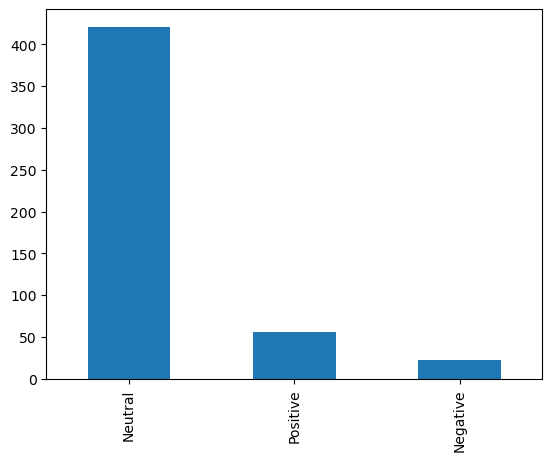

In [45]:
df['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

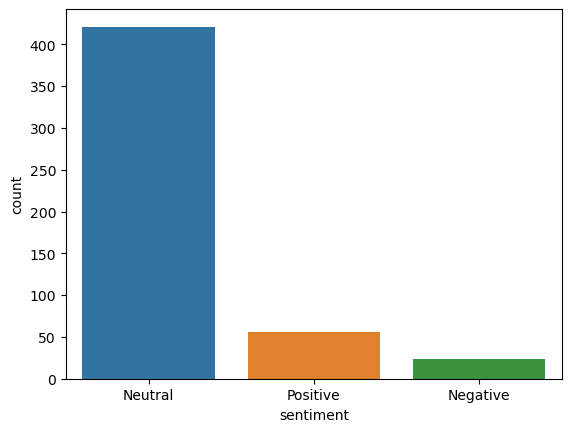

In [46]:
# Plot with seaborn
sns.countplot(df['sentiment'])

In [ ]:
### Keyword Extraction
+ For Positive and Negative Sentiment
+ General

In [48]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [49]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [50]:
positive_tweet

2       Kalau wfh boleh ah ni dah on site ðŸ«£ nak en...
24      Mulai hari ini ya wfh Selamat wfh beb Hatihat...
28     Emang gara2 kantor full wfh ah elahhh untung d...
31     Sedih breh gue kalo jam pulang kantor atau jam...
41     Nasib esok wfh Barai kalau kena masuk opis Jau...
55     Daripada uji uji emisi mending dibikin one wee...
64                      Kakak ku bagian HR nder full wfh
67      Aku dong iseh ono wfh ne haha melbu gur semin...
80     work ada yang kerjanya jadi host live wfh kali...
92      Accounting Data Analyst CS Sales Purchasing L...
108     Wfh kerjaan gampang biasa jam 3 sore dah bere...
127     Adalah sama seperti mencari jarum dalam jeram...
131    Mutualku ada alumni S1 akuntansi / manajemen y...
133    Sedang menanti hari untuk wfh yang sudah diren...
134     Jaman wfh 100% pas covid delta begini nih mak...
135         knp ada free takjil di kantor pas aku lg wfh
139     Ka saya juga ngajar di TK dengan gaji sebulan...
150    Center for Research on E

In [51]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [52]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [53]:
positive_tweet_list

['Kalau wfh boleh ah ni dah site ðŸ«£ nak enjoy secangkir kopi pun tak syok',
 'Mulai hari ini ya wfh Selamat wfh beb Hatihati ketagihan hahaha tp kosankantor lu deket si ya sebenernya',
 'Emang gara2 kantor wfh ah elahhh untung dah kelar ini kutukan nih akun jadi B*G oriented account malah akun sebelah secara ga sengaja ah elah',
 'Sedih breh gue kalo jam pulang kantor atau jam jam galau pas wfh gak bisa sambil nonton livestream mista di background lagi ðŸ¥² sekarang tinggal enaur yg jam live anak niji nya cocok sama aing ðŸ¥² hiks sedih',
 'Nasib esok wfh Barai kalau kena masuk opis Jauh kot bangsar ðŸ˜\xadðŸ˜\xadðŸ˜\xad tiap kali fikir jauh selalu sedapkan hati takpe sini flexi good pay amp environment Stay je dulu setahun hahahaha',
 'Daripada uji uji emisi mending dibikin week emisi ga sih (jadi seminggu dulu nih cobaaa week emisi gausah pake wfh wfh asn buat apaaa hahahaha) Jadi bener2 transportasi umum gimana tuh kan ide bagus Diwajibkan tnp pndg bulu',
 'Kakak ku bagian HR nder

In [54]:
# Tokenization
for line in positive_tweet_list:
# print(line)
    for token in line.split():
        print(token)

Kalau
wfh
boleh
ah
ni
dah
site
ðŸ«£
nak
enjoy
secangkir
kopi
pun
tak
syok
Mulai
hari
ini
ya
wfh
Selamat
wfh
beb
Hatihati
ketagihan
hahaha
tp
kosankantor
lu
deket
si
ya
sebenernya
Emang
gara2
kantor
wfh
ah
elahhh
untung
dah
kelar
ini
kutukan
nih
akun
jadi
B*G
oriented
account
malah
akun
sebelah
secara
ga
sengaja
ah
elah
Sedih
breh
gue
kalo
jam
pulang
kantor
atau
jam
jam
galau
pas
wfh
gak
bisa
sambil
nonton
livestream
mista
di
background
lagi
ðŸ¥²
sekarang
tinggal
enaur
yg
jam
live
anak
niji
nya
cocok
sama
aing
ðŸ¥²
hiks
sedih
Nasib
esok
wfh
Barai
kalau
kena
masuk
opis
Jauh
kot
bangsar
ðŸ˜­ðŸ˜­ðŸ˜­
tiap
kali
fikir
jauh
selalu
sedapkan
hati
takpe
sini
flexi
good
pay
amp
environment
Stay
je
dulu
setahun
hahahaha
Daripada
uji
uji
emisi
mending
dibikin
week
emisi
ga
sih
(jadi
seminggu
dulu
nih
cobaaa
week
emisi
gausah
pake
wfh
wfh
asn
buat
apaaa
hahahaha)
Jadi
bener2
transportasi
umum
gimana
tuh
kan
ide
bagus
Diwajibkan
tnp
pndg
bulu
Kakak
ku
bagian
HR
nder
wfh
Aku
dong
iseh
ono
wfh
ne
haha


In [55]:
pos_tokens = [token for line in positive_tweet_list for token in line.split()]

In [56]:
neg_tokens = [token for line in negative_tweet_list for token in line.split()]
neu_tokens = [token for line in neutral_tweet_list for token in line.split()]

In [57]:
neg_tokens

['sad',
 'year',
 'perbarisan',
 'kat',
 'putrajaya',
 'ðŸ˜£',
 'tak',
 'dpt',
 'wfh',
 'hari',
 'rabu',
 'huwaa',
 'Bisa',
 'sambilan',
 'kok',
 'Magang',
 'wfh',
 'sama',
 'wfo',
 'beda',
 'drastis',
 'aku',
 'pernah',
 'ngalamin',
 '2',
 '2nya',
 'lebih',
 'banyak',
 'ilmu',
 'yg',
 'didapet',
 'kalo',
 'wfo',
 'bukan',
 'cuma',
 'ilmu',
 'hard',
 'skill',
 'tapi',
 'soft',
 'skill',
 'jg',
 'Btw',
 'kalo',
 'perlu',
 'jasa',
 'buat',
 'amp',
 'review',
 'cv',
 'linkedin',
 'amp',
 'surat',
 'lamaran',
 'bisa',
 ':(',
 'Buat',
 'gua',
 'sisi',
 'ga',
 'menyenangkannya',
 'kerjaan',
 'gua',
 'yang',
 'WFH',
 'jadi',
 'susah',
 'ketemu',
 'tementemen',
 'Beh',
 'mung',
 'pengen',
 'wfh',
 'akuiii',
 'kuwesel',
 'seng',
 'ditemoni',
 'kui',
 'neh',
 'kui',
 'neh',
 'nang',
 'kantor',
 'kerjo',
 'ben',
 'gak',
 'stress',
 'iki',
 'malah',
 'nyelot',
 'stress',
 'tp',
 'aku',
 'butuh',
 'duit',
 'hiks',
 ':(',
 'ada',
 'kesempatan',
 'magang',
 'wfh',
 'tp',
 'kamu',
 'milih',
 'magang',

In [58]:
# Get Most Commonest Keywords
from collections import Counter

In [59]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [60]:
get_tokens(pos_tokens)

{'wfh': 39,
 'dan': 22,
 'di': 21,
 'WFH': 15,
 'yg': 13,
 'kerja': 13,
 'bisa': 12,
 'yang': 12,
 'hari': 11,
 '1': 11,
 'ga': 10,
 'ada': 10,
 '2': 10,
 'jadi': 8,
 'jam': 8,
 'pas': 8,
 'sama': 8,
 'aku': 8,
 'atau': 7,
 'lagi': 7,
 'dulu': 7,
 'kerjanya': 7,
 'udah': 7,
 'freelance': 7,
 'ini': 6,
 'ya': 6,
 'amp': 6,
 'itu': 6,
 '3': 6,
 'tapi': 6}

In [62]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neu_words = get_tokens(neu_tokens)

In [63]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(), columns=['words','scores'])

In [64]:
neg_df

,words,scores
0,wfh,12
1,di,7
2,yg,6
3,dan,6
4,aku,4
5,kalo,4
6,ga,4
7,WFH,4
8,malah,4
9,tp,4


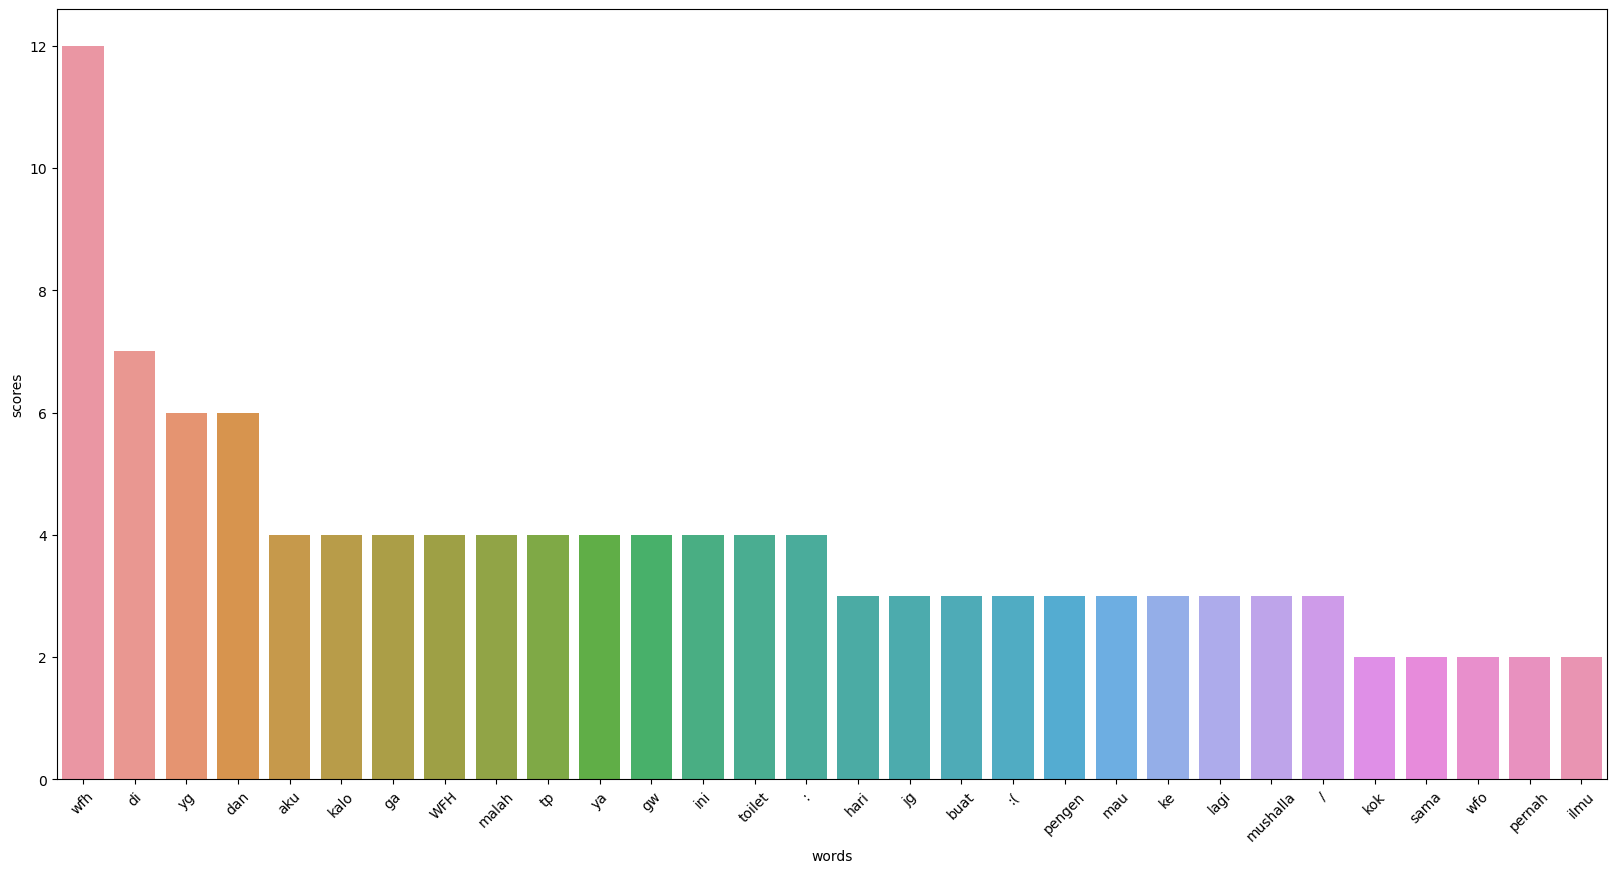

In [65]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

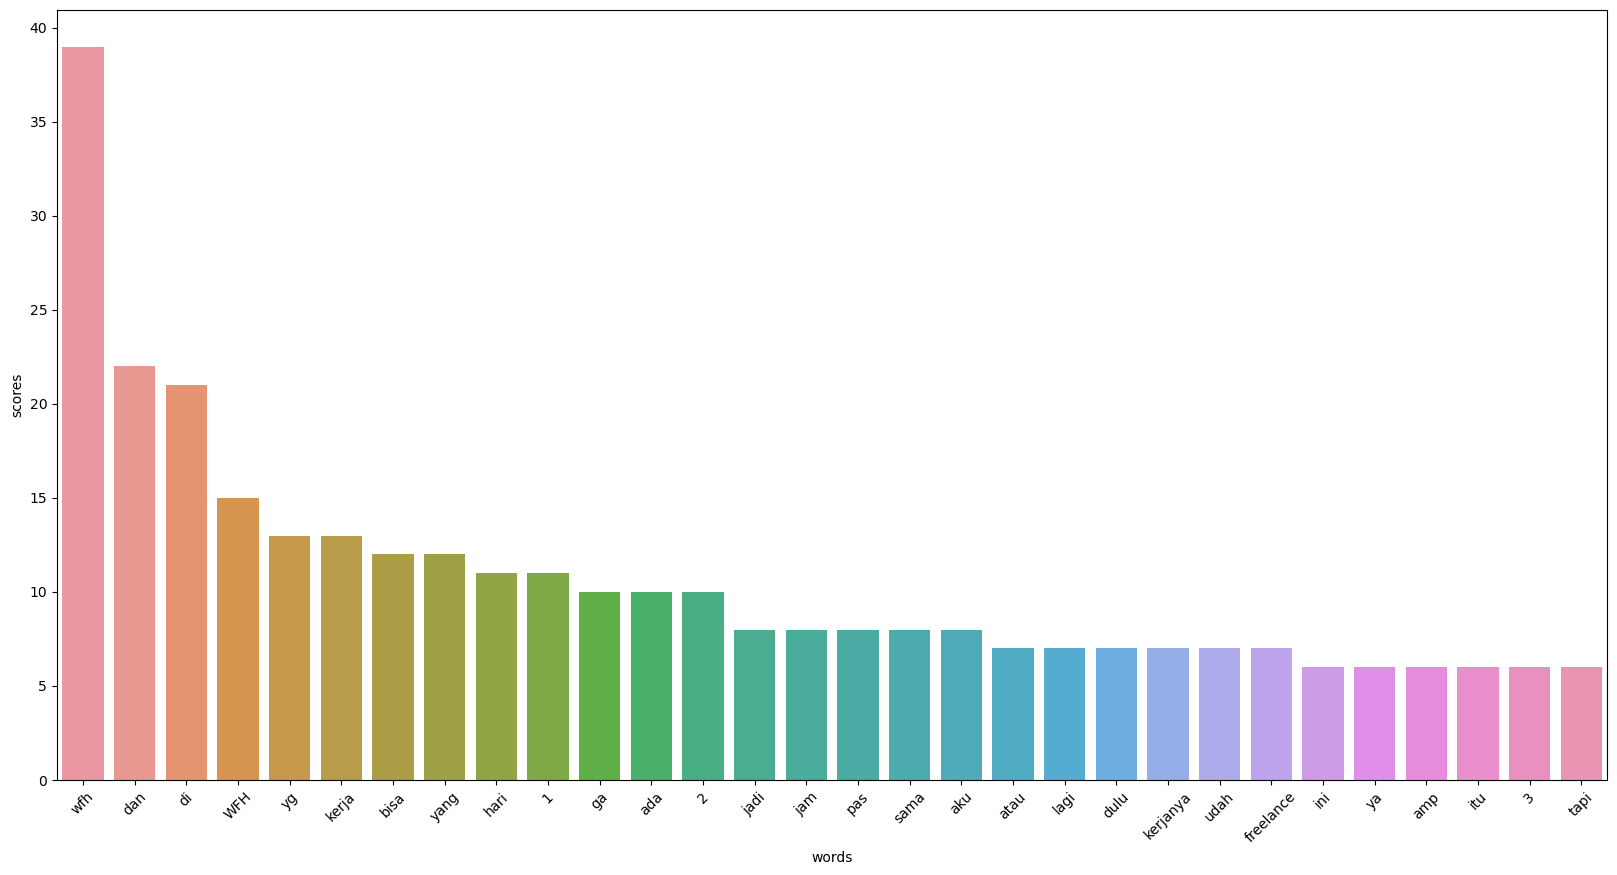

In [66]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(), columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

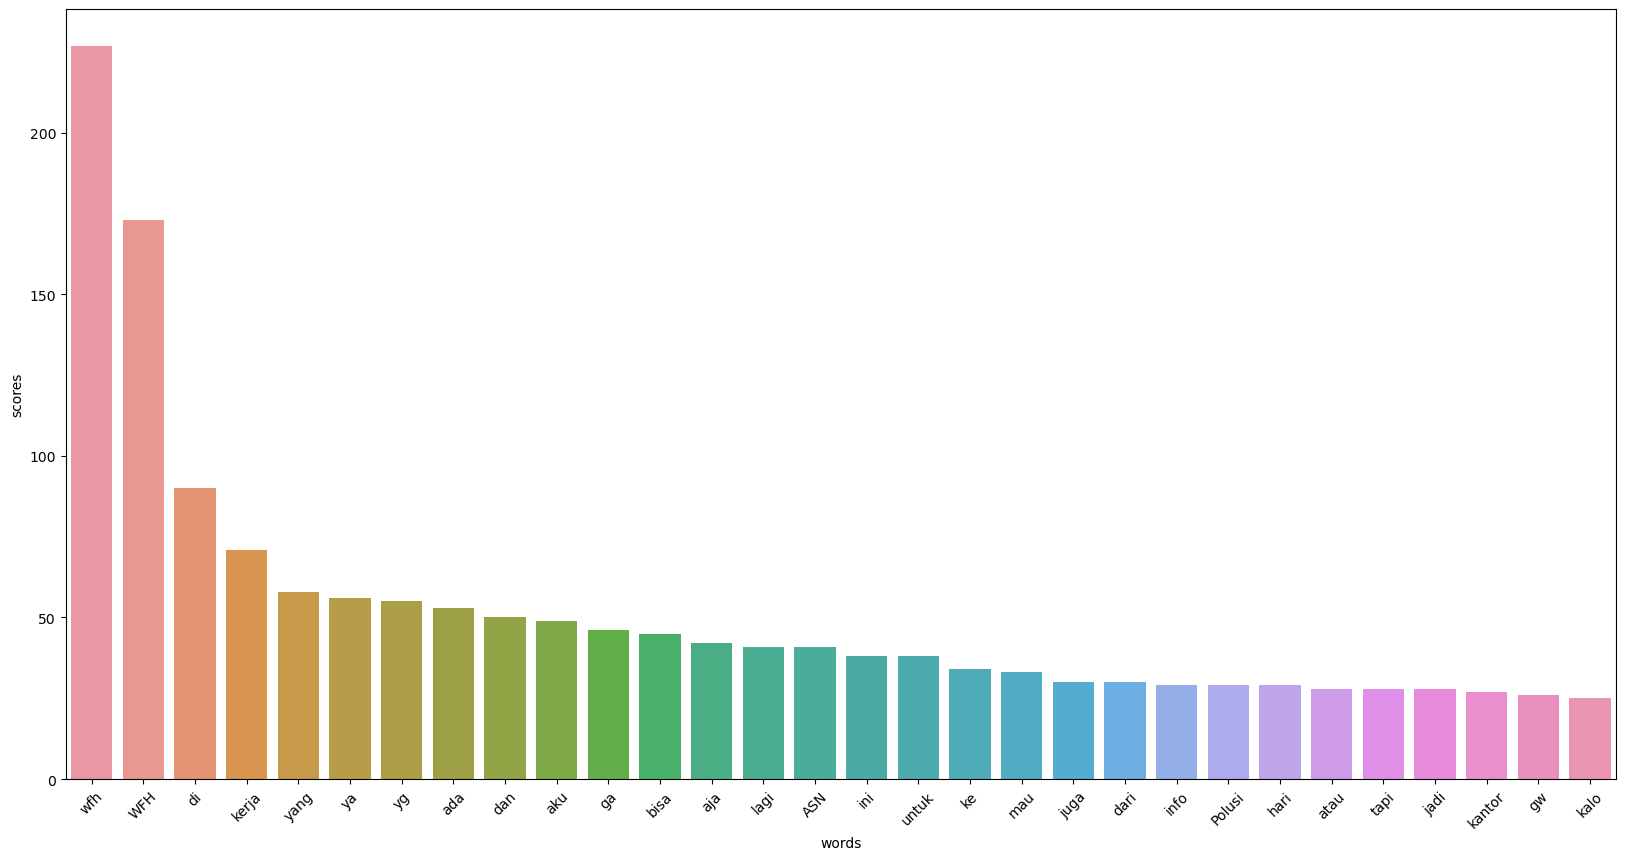

In [67]:
# Plot with seaborn
neu_df = pd.DataFrame(most_common_neu_words.items(), columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neu_df)
plt.xticks(rotation=45)
plt.show()

In [68]:
### Word Cloud
from wordcloud import WordCloud

In [69]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [70]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neu_tokens)

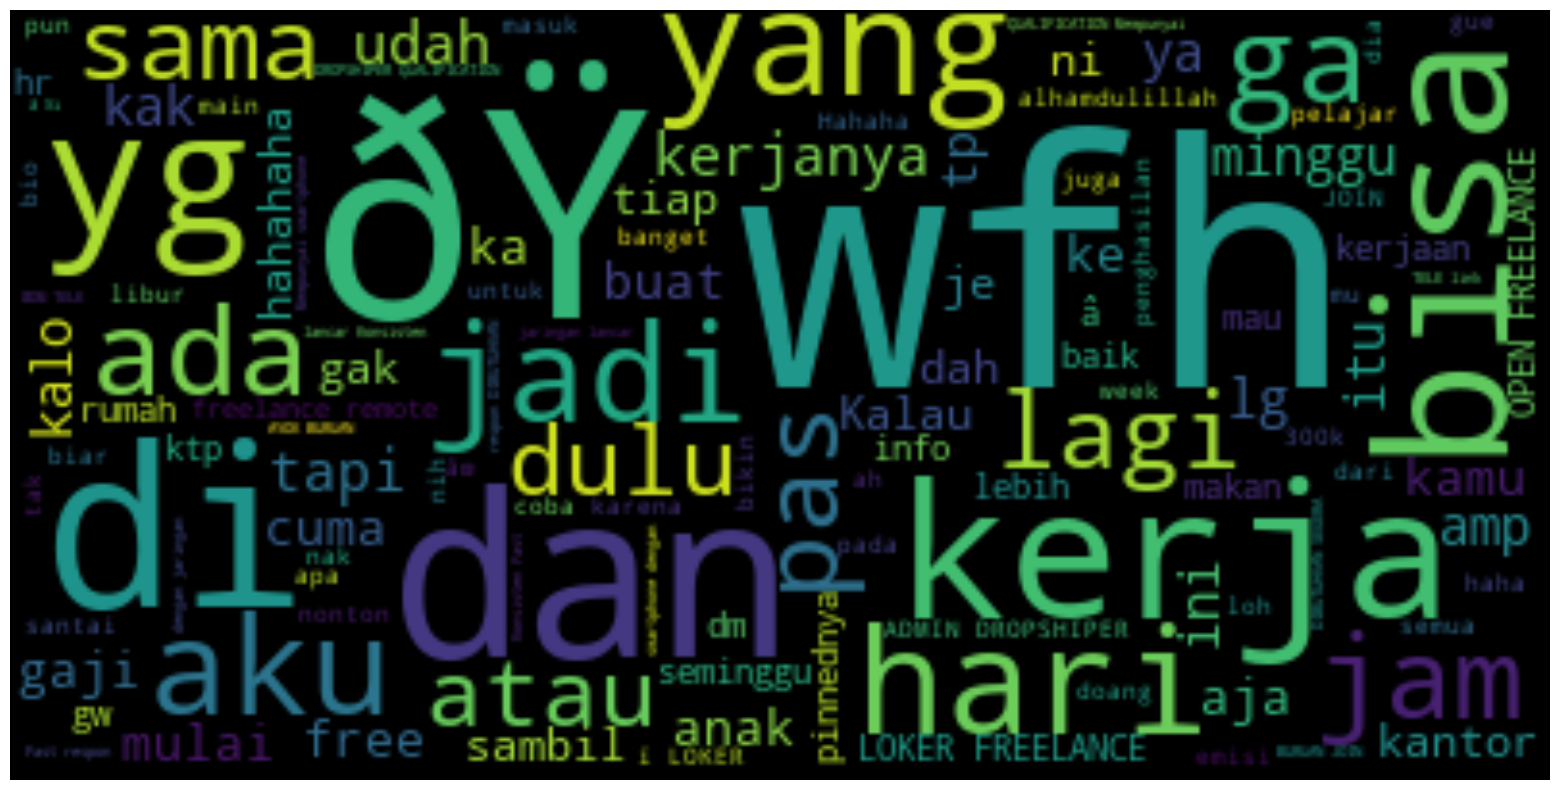

In [72]:
plot_wordcloud(pos_docx)

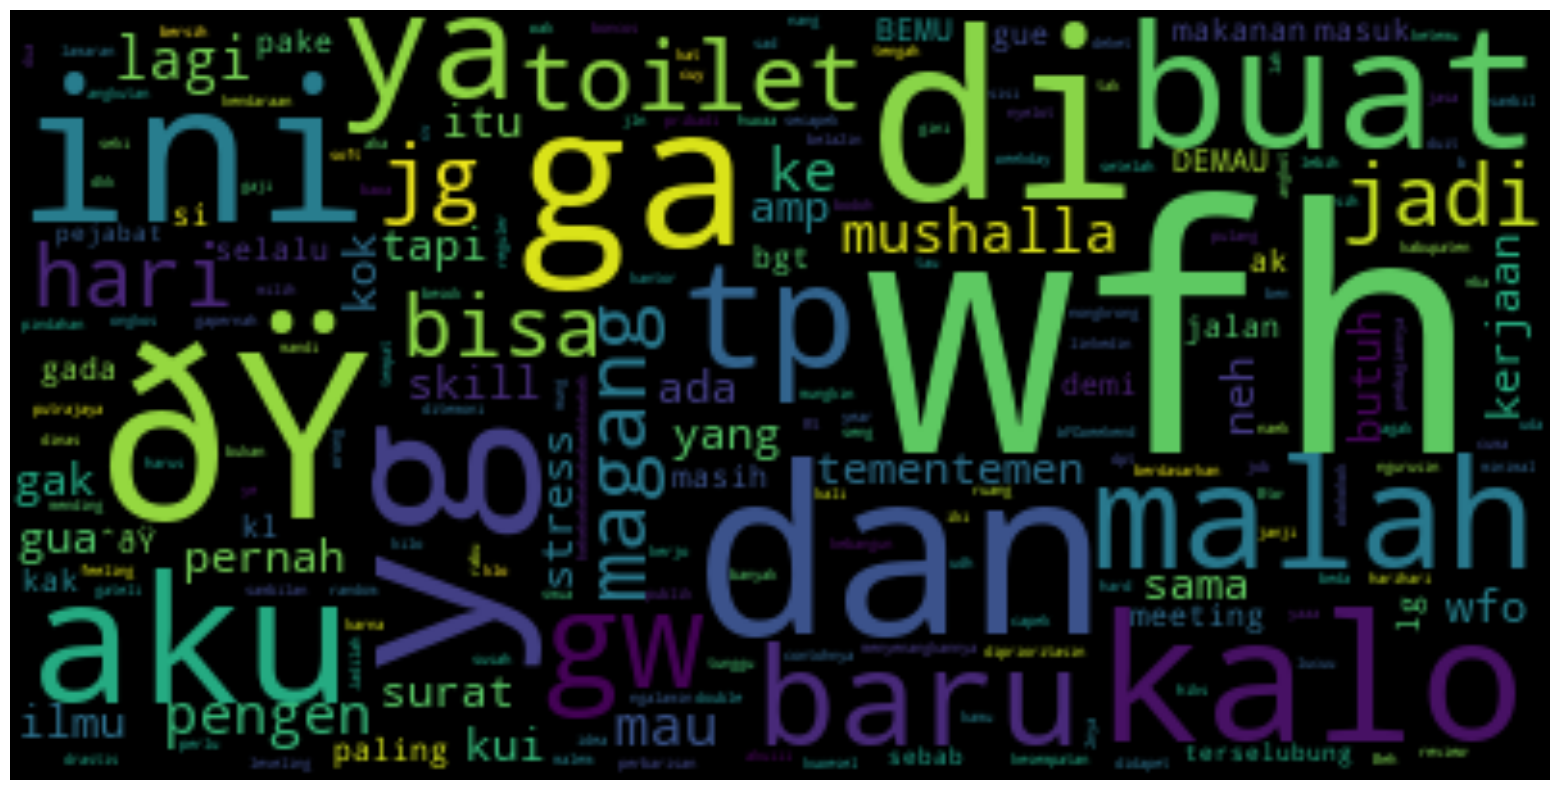

In [73]:
plot_wordcloud(neg_docx)

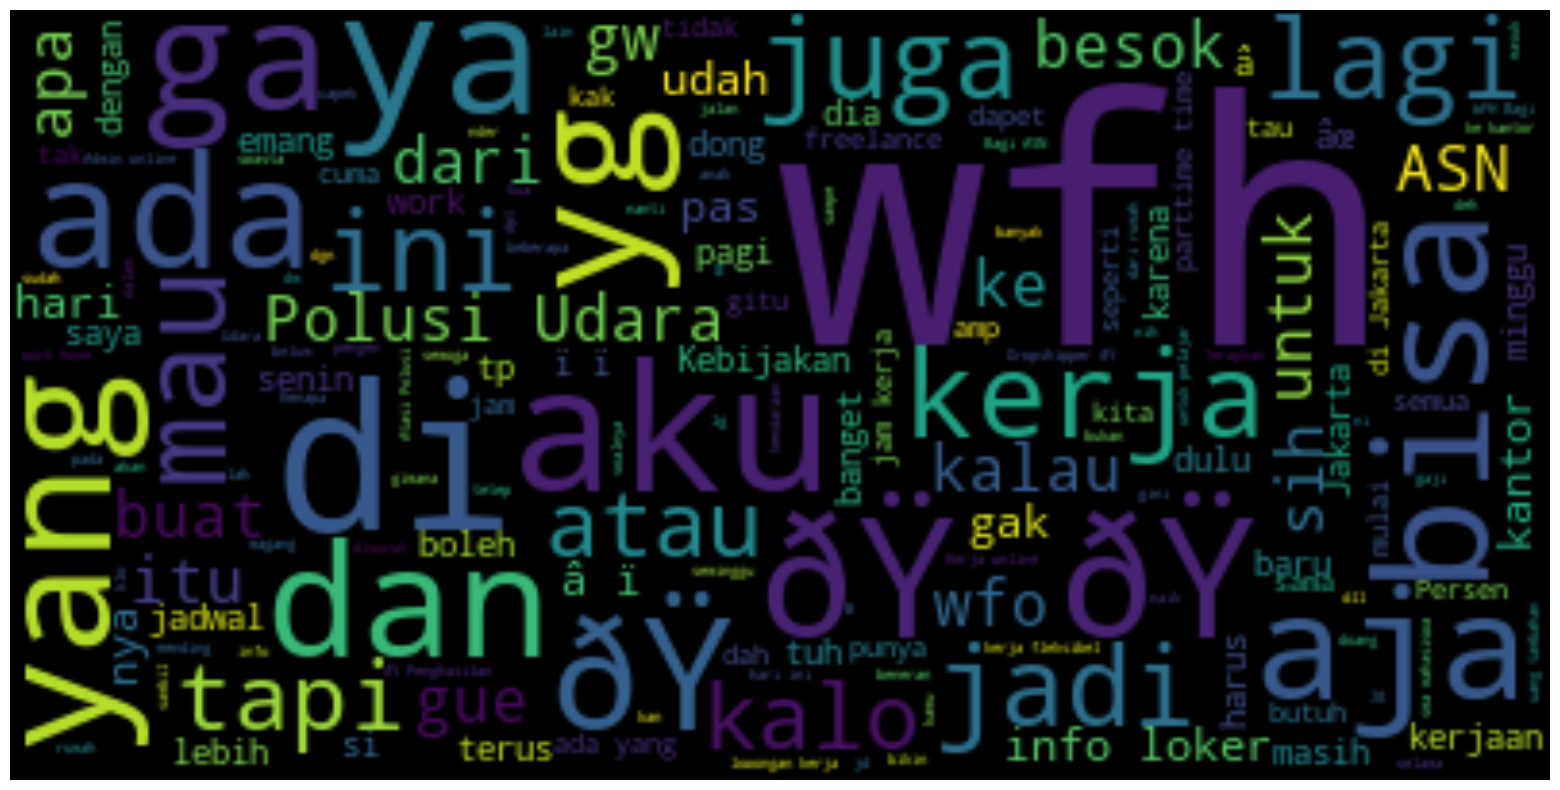

In [74]:
plot_wordcloud(neu_docx)

In [75]:
### Duta Wicaksono
### 29-08-2023

In [76]:
pip install -U notebook-as-pdf

     -------------------------------------- 83.4/83.4 kB 937.7 kB/s eta 0:00:00
     -------------------------------------- 232.6/232.6 kB 1.0 MB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 530.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
